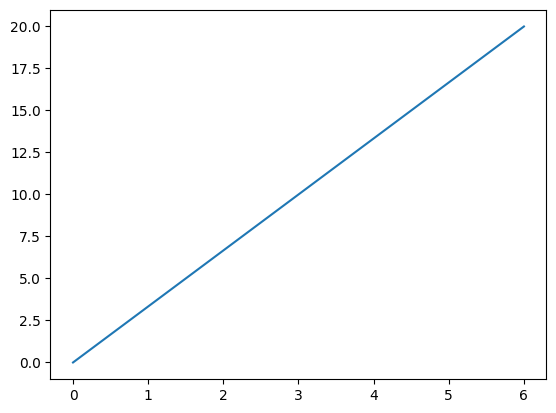

In [2]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0, 6])
ypoints = np.array([0, 20])

plt.plot(xpoints, ypoints)
plt.show()

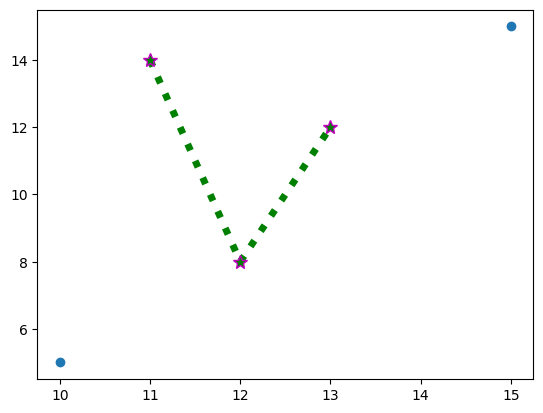

In [21]:
xpoints = np.array([10, 15])
ypoints = np.array([5, 15])

x2points = np.array([11, 12, 13])
y2points = np.array([14, 8, 12])

plt.plot(xpoints, ypoints, "o")
plt.plot(x2points, y2points, "*:g", ms=10, mec="m", lw=5)
plt.show()

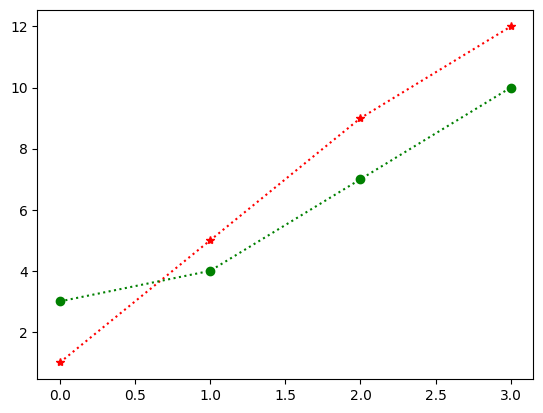

In [26]:
y1 = np.array([1, 5, 9, 12])
y2 = np.array([3, 4, 7, 10])

plt.plot(y1, "*:r")
plt.plot(y2, "o:g")
plt.show()

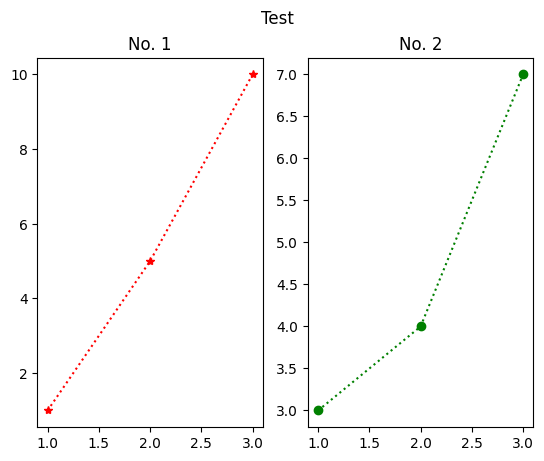

In [49]:
# plot 1:
x1 = np.array([1, 2, 3])
y1 = np.array([1, 5, 10])

plt.subplot(1, 2, 1)
plt.plot(x1, y1, "*:r")
plt.title("No. 1")

x2 = np.array([1, 2, 3])
y2 = np.array([3, 4, 7])

plt.subplot(1, 2, 2)
plt.plot(x2, y2, "o:g")
plt.title("No. 2")

plt.suptitle("Test")
plt.show()

In [ ]:
x = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
y = np.array([240, 250, 260, 270, 280, 290, 300, 310, 320, 330])

font1 = {"family": "serif", "color": "hotpink", "size": 20}
font2 = {"family": "serif", "color": "lightpink", "size": 15}

plt.title("Sportswatch Data", fontdict=font1, loc="left")
plt.xlabel("Average Pulse", fontdict=font2)
plt.ylabel("Calorie Burnage", fontdict=font2)

plt.plot(x, y, "*")
plt.grid(ls="--")

plt.show()

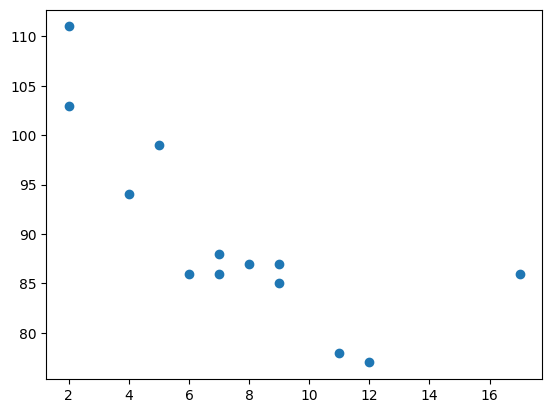

In [50]:
x = np.array([5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6])
y = np.array([99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86])

plt.scatter(x, y)
plt.show()